In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
oil=pd.read_excel("Brent.xls")
oil

,Date,SpotPrice
0,2016-10-03,48.61
1,2016-10-04,48.81
2,2016-10-05,49.57
3,2016-10-06,50.14
4,2016-10-07,50.49
...,...,...
1304,2021-11-16,82.85
1305,2021-11-17,80.67
1306,2021-11-18,82.45
1307,2021-11-19,80.24


In [4]:
oil.rename(columns={'SpotPrice':'Price'},inplace=True)

In [5]:
##Setting Date as Index
oil.set_index('Date',inplace=True)


In [6]:
oil.head()

,Price
Date,
2016-10-03,48.61
2016-10-04,48.81
2016-10-05,49.57
2016-10-06,50.14
2016-10-07,50.49


In [7]:
oil.shape

(1309, 1)

### Line Plot

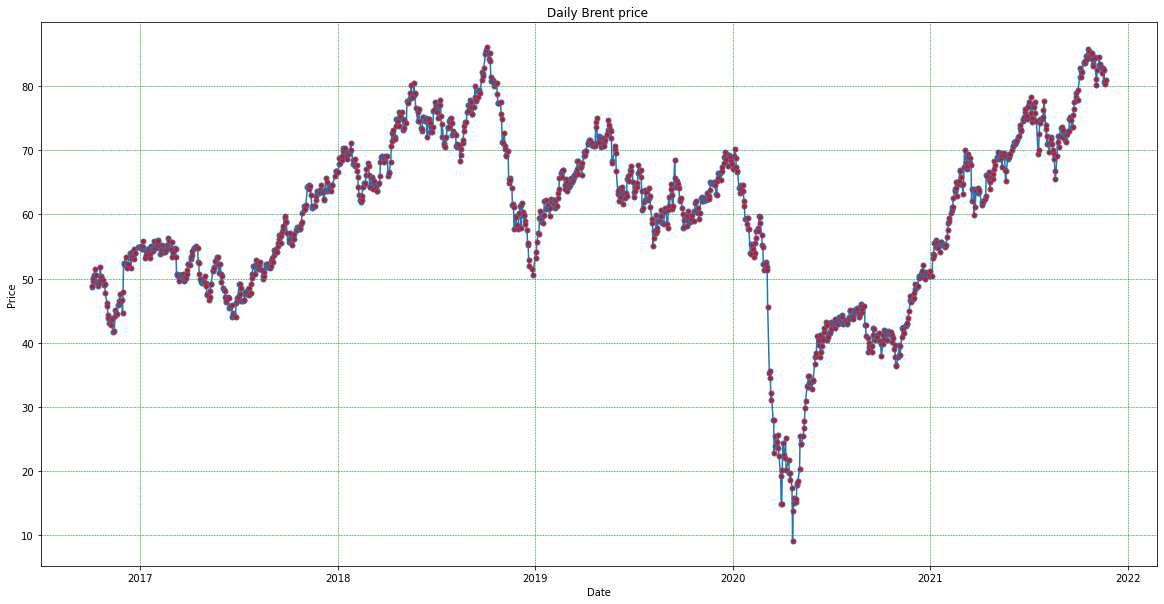

In [8]:
plt.figure(figsize=(20,10))
plt.title("Daily Brent price ")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(oil, marker = 'o', ms = 5, mfc = 'r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

## Histogram and Density Plot

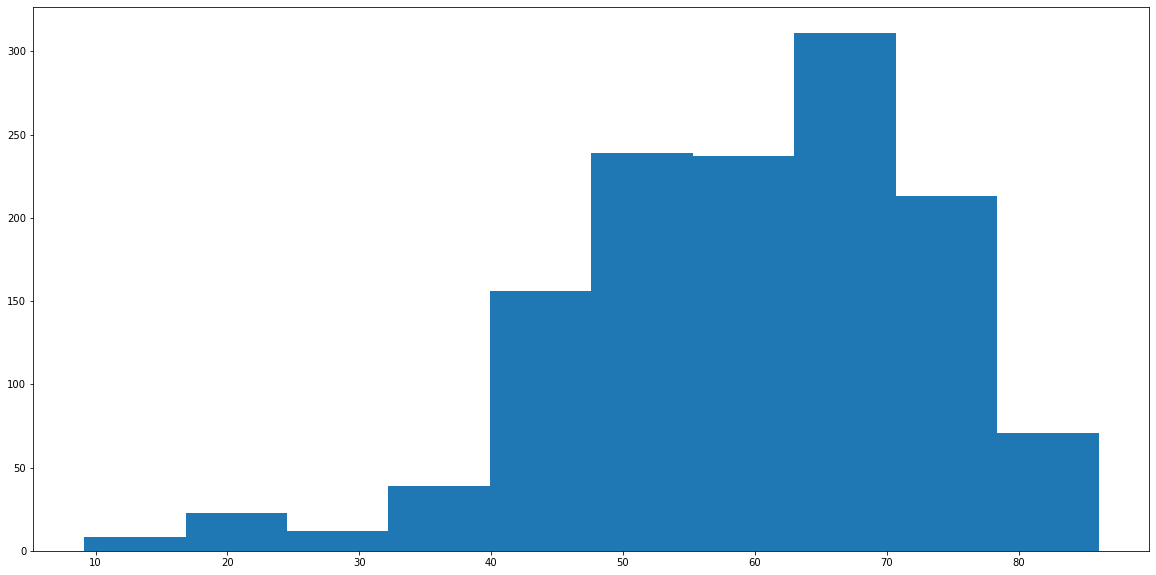

In [9]:
plt.figure(figsize=(20,10))
plt.subplot()
plt.hist(oil)
plt.show()

<Figure size 1440x720 with 0 Axes>

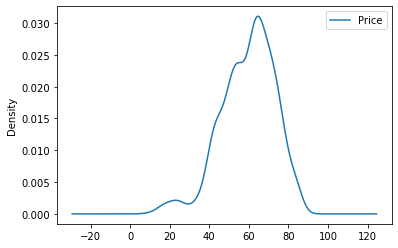

In [10]:
plt.figure(figsize=(20,10))
oil.plot(kind='kde')
plt.show()

## Box Plot

In [11]:
## Temporary DataFrame
temp_data = oil
temp_data['Year'] = oil.index.year

Text(0.5, 1.0, 'Box Plot Year Wise-WTI')

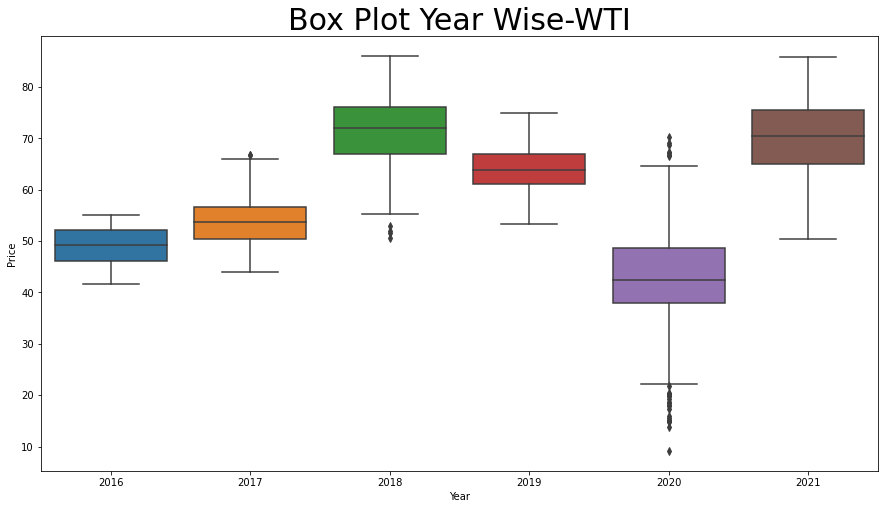

In [12]:
##Box Plot Year Wise Brent
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['Price'])
ax.set_title('Box Plot Year Wise-WTI',fontsize=30)

In [22]:
oil

,Price,Year
Date,,
2016-10-03,48.61,2016
2016-10-04,48.81,2016
2016-10-05,49.57,2016
2016-10-06,50.14,2016
2016-10-07,50.49,2016
...,...,...
2021-11-16,82.85,2021
2021-11-17,80.67,2021
2021-11-18,82.45,2021


## Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

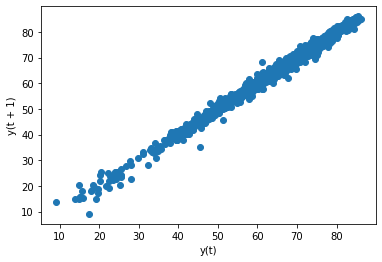

In [13]:
from pandas.plotting import lag_plot

lag_plot(oil['Price'])

In [14]:
## lag scatter plot gives a Positive correction relationship . Hence they can be modelled.

## AutoCorrelation Function (ACF)

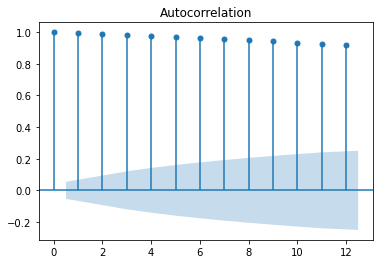

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(oil['Price'], lags=12)
plt.show()

## Partial AutoCorrelation Function (PCAF)

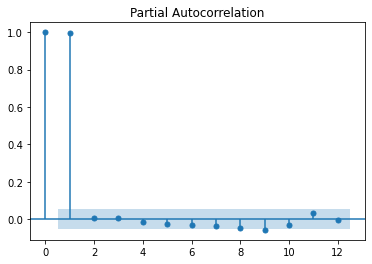

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(oil['Price'],lags=12)
plt.show()

## In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.